# Siddhi Nyati

# **Importing Data:**

In [9]:
import numpy as np
import pandas as pd

In [12]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Upload the text file
uploaded = files.upload()

# Read the content of the text file
txt_content = io.StringIO(uploaded['profits (4).txt'].decode('utf-8'))

# Parse the content into numpy array
data = np.loadtxt(txt_content, delimiter=',')

# Convert the NumPy array to a Pandas DataFrame
data_df = pd.DataFrame(data, columns=['Population', 'Profit'])

Saving profits.txt to profits (4).txt


In [13]:
print("First 5 rows of the DataFrame:")
data_df.head()

First 5 rows of the DataFrame:


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [22]:
print("Dataframe details:")
data_df.info()

Dataframe details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [21]:
num_rows, num_columns = data_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 97
Number of columns: 2


In [20]:
print("Data types of columns:")
print(data_df.dtypes)

Data types of columns:
Population    float64
Profit        float64
dtype: object


In [19]:
print("Range of values for each column:")
for column in data_df.columns:
    print(f"{column}: Min = {data_df[column].min()}, Max = {data_df[column].max()}")

Range of values for each column:
Population: Min = 5.0269, Max = 22.203
Profit: Min = -2.6807, Max = 24.147


In [23]:
import matplotlib.pyplot as plt

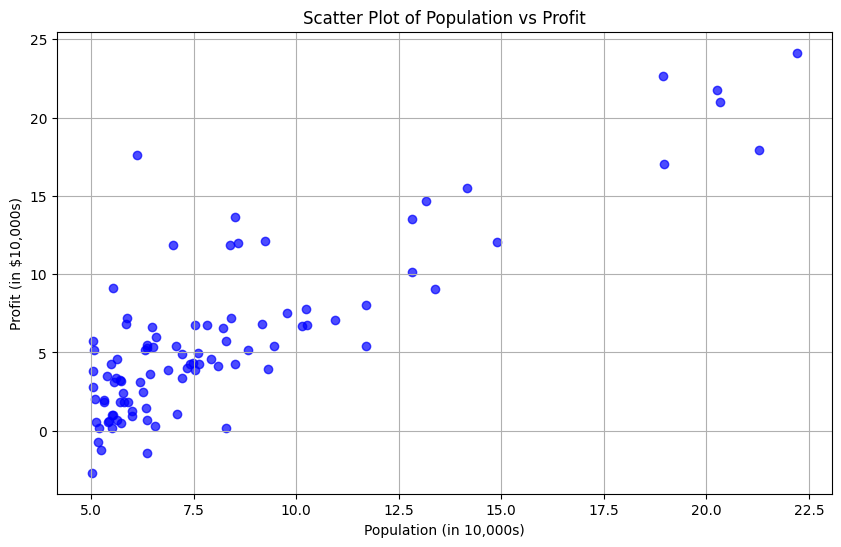

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Population'], data_df['Profit'], marker='o', color='blue', alpha=0.7)
plt.title('Scatter Plot of Population vs Profit')
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in $10,000s)')
plt.grid(True)
plt.show()


# **Linear Regression:**

question1:

In [77]:
import numpy as np

class MyLinearRegression:
    def __init__(self, X, Y):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")
        self.X = X
        self.Y = Y
        self.num_samples, self.num_features = X.shape
if __name__ == "__main__":
    X = np.array([[1, 2], [3, 4], [5, 6]])
    Y = np.array([3, 7,1])
    try:
        model_correct = MyLinearRegression(X, Y)
        print("Instance with correct dimensions created successfully.")
        model_incorrect = MyLinearRegression(X, Y)
    except ValueError as e:
        print(f"Error: {e}")

Instance with correct dimensions created successfully.


question2:

In [78]:
import numpy as np
import pandas as pd

class MyLinearRegression:
    def __init__(self, X, Y, learning_rate=0.01, total_iterations=1000):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")
        self.X = X
        self.Y = Y
        self.num_samples, self.num_features = X.shape
        self.theta = np.zeros(self.num_features + 1)
        self.learning_rate = learning_rate
        self.total_iterations = total_iterations
    def fit(self):
        for _ in range(self.total_iterations):
            predictions = self.predict(self.X)
            errors = predictions - self.Y
            self.theta[0] -= self.learning_rate * np.sum(errors) / self.num_samples
            for i in range(1, self.num_features + 1):
                self.theta[i] -= self.learning_rate * np.sum(errors * self.X[:, i - 1]) / self.num_samples
    def predict(self, X):
        return np.dot(X, self.theta[1:]) + self.theta[0]
if __name__ == "__main__":
    X_data = data_df[['Population']].values
    Y_data = data_df['Profit'].values
    model_data = MyLinearRegression(X_data, Y_data, learning_rate=0.01, total_iterations=1000)
    model_data.fit()
    print("Trained Model Parameters:")
    print("Bias (Theta 0):", model_data.theta[0])
    print("Coefficient (Theta 1):", model_data.theta[1])

Trained Model Parameters:
Bias (Theta 0): -3.241402144274422
Coefficient (Theta 1): 1.1272942024281842


questuion3:

In [79]:
import numpy as np
import pandas as pd

class MyLinearRegression:
    def __init__(self, X, Y, learning_rate=0.01, total_iterations=1000):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")
        self.X = X
        self.Y = Y
        self.num_samples, self.num_features = X.shape
        self.theta = np.zeros(self.num_features + 1)
        self.learning_rate = learning_rate
        self.total_iterations = total_iterations
    def compute_cost(self):
        predictions = self.predict(self.X)
        errors = predictions - self.Y
        cost = np.sum(errors**2) / (2 * self.num_samples)
        return cost
    def fit(self):
        for _ in range(self.total_iterations):
            predictions = self.predict(self.X)
            errors = predictions - self.Y
            self.theta[0] -= self.learning_rate * np.sum(errors) / self.num_samples
            for i in range(1, self.num_features + 1):
                self.theta[i] -= self.learning_rate * np.sum(errors * self.X[:, i - 1]) / self.num_samples
    def predict(self, X):
        return np.dot(X, self.theta[1:]) + self.theta[0]
if __name__ == "__main__":
    X_data = data_df[['Population']].values
    Y_data = data_df['Profit'].values
    model_data = MyLinearRegression(X_data, Y_data, learning_rate=0.01, total_iterations=1000)
    model_data.fit()
    cost_value = model_data.compute_cost()
    print("Cost Function (J(Θ)):", cost_value)

Cost Function (J(Θ)): 4.515955503078914


question4:

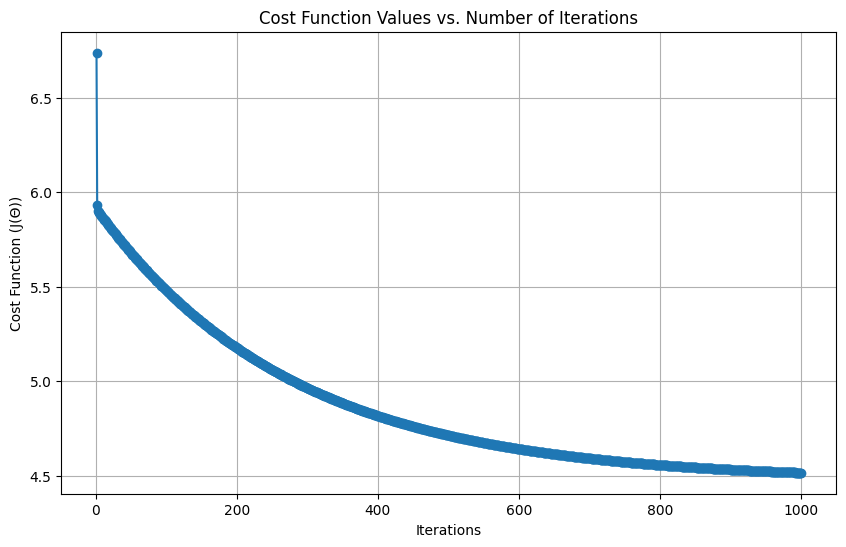

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MyLinearRegression:
    def __init__(self, X, Y, learning_rate=0.01, total_iterations=1000):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")
        self.X = X
        self.Y = Y
        self.num_samples, self.num_features = X.shape
        self.theta = np.zeros(self.num_features + 1)
        self.learning_rate = learning_rate
        self.total_iterations = total_iterations
    def compute_cost(self):
        predictions = self.predict(self.X)
        errors = predictions - self.Y
        cost = np.sum(errors**2) / (2 * self.num_samples)
        return cost
    def fit(self):
        for _ in range(self.total_iterations):
            predictions = self.predict(self.X)
            errors = predictions - self.Y
            self.theta[0] -= self.learning_rate * np.sum(errors) / self.num_samples
            for i in range(1, self.num_features + 1):
                self.theta[i] -= self.learning_rate * np.sum(errors * self.X[:, i - 1]) / self.num_samples
    def batch_gradient_descent(self):
        cost_history = []
        for iteration in range(self.total_iterations):
            predictions = self.predict(self.X)
            errors = predictions - self.Y
            self.theta[0] -= self.learning_rate * np.sum(errors) / self.num_samples  # Update for bias term

            for i in range(1, self.num_features + 1):
                self.theta[i] -= self.learning_rate * np.sum(errors * self.X[:, i - 1]) / self.num_samples
            cost_value = self.compute_cost()
            cost_history.append(cost_value)

        return cost_history

    def predict(self, X):
        return np.dot(X, self.theta[1:]) + self.theta[0]

    def plot_cost_history(self, cost_history):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.total_iterations + 1), cost_history, marker='o', linestyle='-')
        plt.title('Cost Function Values vs. Number of Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost Function (J(Θ))')
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    X_data = data_df[['Population']].values
    Y_data = data_df['Profit'].values
    model_data = MyLinearRegression(X_data, Y_data, learning_rate=0.01, total_iterations=1000)
    cost_history_data = model_data.batch_gradient_descent()
    model_data.plot_cost_history(cost_history_data)

question5:

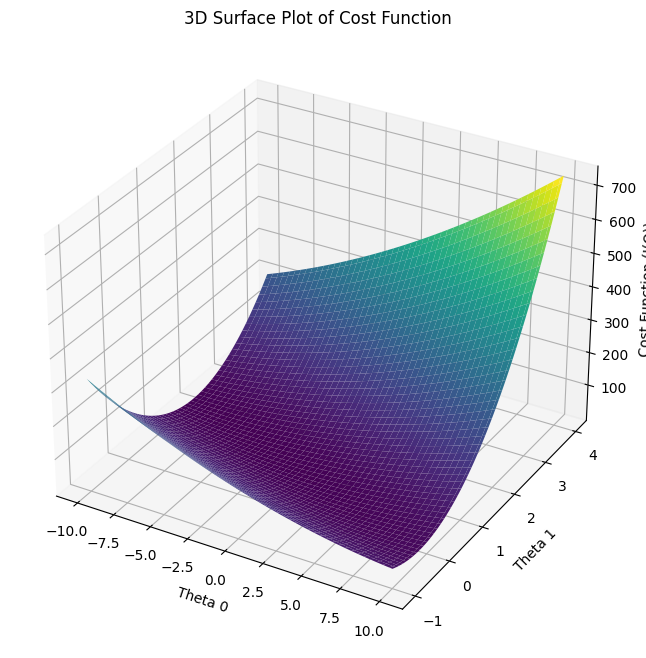

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MyLinearRegression:
    def __init__(self, X, Y, learning_rate=0.01, total_iterations=1000):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")
        self.X = X
        self.Y = Y
        self.num_samples, self.num_features = X.shape
        self.theta = np.zeros(self.num_features + 1)  # Additional parameter for bias term
        self.learning_rate = learning_rate
        self.total_iterations = total_iterations

    def compute_cost(self):
        predictions = self.predict(self.X)
        errors = predictions - self.Y
        cost = np.sum(errors**2) / (2 * self.num_samples)
        return cost

    def generate_parameter_meshgrid(self, num_points=100):
        theta0_vals = np.linspace(-10, 10, num_points)
        theta1_vals = np.linspace(-1, 4, num_points)
        theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
        return theta0_mesh, theta1_mesh

    def compute_cost_meshgrid(self, theta0_mesh, theta1_mesh):
        cost_mesh = np.zeros_like(theta0_mesh, dtype=float)
        for i in range(theta0_mesh.shape[0]):
            for j in range(theta0_mesh.shape[1]):
                self.theta[0] = theta0_mesh[i, j]
                self.theta[1] = theta1_mesh[i, j]
                cost_mesh[i, j] = self.compute_cost()
        return cost_mesh

    def plot_3d_surface(self, theta0_mesh, theta1_mesh, cost_mesh):
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(theta0_mesh, theta1_mesh, cost_mesh, cmap='viridis')
        ax.set_xlabel('Theta 0')
        ax.set_ylabel('Theta 1')
        ax.set_zlabel('Cost Function (J(Θ))')
        ax.set_title('3D Surface Plot of Cost Function')
        plt.show()

    def fit(self):
        for _ in range(self.total_iterations):
            predictions = self.predict(self.X)
            errors = predictions - self.Y
            self.theta[0] -= self.learning_rate * np.sum(errors) / self.num_samples
            for i in range(1, self.num_features + 1):
                self.theta[i] -= self.learning_rate * np.sum(errors * self.X[:, i - 1]) / self.num_samples

    def predict(self, X):
        return np.dot(X, self.theta[1:]) + self.theta[0]

if __name__ == "__main__":
    X_data = data_df[['Population']].values
    Y_data = data_df['Profit'].values
    model_data = MyLinearRegression(X_data, Y_data, learning_rate=0.01, total_iterations=1000)
    theta0_mesh, theta1_mesh = model_data.generate_parameter_meshgrid()
    cost_mesh = model_data.compute_cost_meshgrid(theta0_mesh, theta1_mesh)
    model_data.plot_3d_surface(theta0_mesh, theta1_mesh, cost_mesh)


question6:

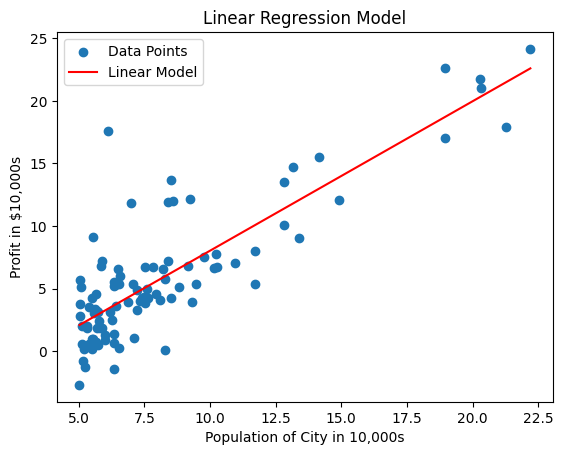

In [88]:
import numpy as np
import matplotlib.pyplot as plt

class MyLinearRegression:
    def __init__(self, X, Y):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")
        self.X = X
        self.Y = Y
        self.num_samples, self.num_features = X.shape
        self.theta = None

    def fit(self):
        X_extended = np.c_[np.ones(self.num_samples), self.X]
        self.theta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ self.Y

    def plot_linear_model(self):
        if self.theta is None:
            raise ValueError("Model coefficients (theta) not available. Fit the model first.")

        plt.scatter(self.X, self.Y, label='Data Points')
        x_range = np.linspace(np.min(self.X), np.max(self.X), 100)
        y_range = self.theta[0] + self.theta[1] * x_range
        plt.plot(x_range, y_range, color='red', label='Linear Model')
        plt.xlabel('Population of City in 10,000s')
        plt.ylabel('Profit in $10,000s')
        plt.title('Linear Regression Model')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    X_data = data_df[['Population']].values
    Y_data = data_df['Profit'].values
    model_data = MyLinearRegression(X_data, Y_data)
    model_data.fit()
    model_data.plot_linear_model()


question7:

In [89]:
import numpy as np

class MyLinearRegression:
    def __init__(self, X, Y, learning_rate=0.01, total_iterations=1000):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")
        self.X = X
        self.Y = Y
        self.num_samples, self.num_features = X.shape
        self.theta = np.zeros(self.num_features + 1)
        self.learning_rate = learning_rate
        self.total_iterations = total_iterations

    def compute_cost(self):
        predictions = self.predict(self.X)
        errors = predictions - self.Y
        cost = np.sum(errors**2) / (2 * self.num_samples)
        return cost

    def compute_gradients(self):
        predictions = self.predict(self.X)
        errors = predictions - self.Y
        gradients = np.zeros(self.num_features + 1)
        gradients[0] = np.sum(errors) / self.num_samples
        for i in range(1, self.num_features + 1):
            gradients[i] = np.sum(errors * self.X[:, i - 1]) / self.num_samples
        return gradients

    def gradient_descent_step(self):
        gradients = self.compute_gradients()
        self.theta -= self.learning_rate * gradients

    def fit(self):
        for _ in range(self.total_iterations):
            self.gradient_descent_step()

    def predict(self, X):
        return np.dot(X, self.theta[1:]) + self.theta[0]

if __name__ == "__main__":
    X_data = data_df[['Population']].values
    Y_data = data_df['Profit'].values
    model_data = MyLinearRegression(X_data, Y_data, learning_rate=0.01, total_iterations=1000)
    model_data.gradient_descent_step()
    print("Gradients after the first iteration:")
    print(model_data.compute_gradients())

Gradients after the first iteration:
[ -0.45004022 -11.67212851]


question8:

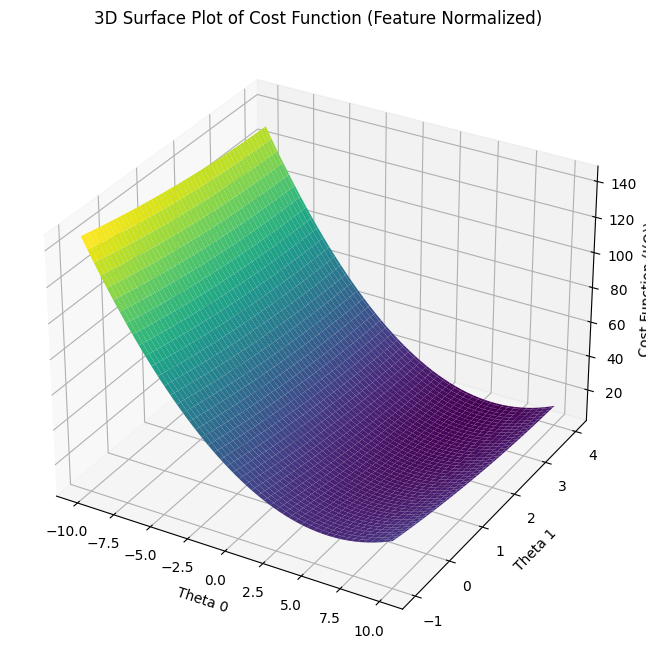

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MyLinearRegression:
    def __init__(self, X, Y, learning_rate=0.01, total_iterations=1000, normalize_features=True):
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise ValueError("Input feature matrix (X) and labels vector (Y) must be numpy arrays.")
        if X.ndim != 2 or Y.ndim != 1:
            raise ValueError("Invalid dimensions. X should be a 2D array, and Y should be a 1D array.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X must match the length of Y.")

        if normalize_features:
            self.X_mean = np.mean(X, axis=0)
            self.X_std = np.std(X, axis=0)
            self.X = (X - self.X_mean) / self.X_std

        self.Y = Y
        self.num_samples, self.num_features = X.shape
        self.theta = np.zeros(self.num_features + 1)
        self.learning_rate = learning_rate
        self.total_iterations = total_iterations

    def compute_cost(self):
        predictions = self.predict(self.X)
        errors = predictions - self.Y
        cost = np.sum(errors**2) / (2 * self.num_samples)
        return cost

    def compute_gradients(self):
        predictions = self.predict(self.X)
        errors = predictions - self.Y
        gradients = np.zeros(self.num_features + 1)
        gradients[0] = np.sum(errors) / self.num_samples

        for i in range(1, self.num_features + 1):
            gradients[i] = np.sum(errors * self.X[:, i - 1]) / self.num_samples

        return gradients

    def gradient_descent_step(self):
        gradients = self.compute_gradients()
        self.theta -= self.learning_rate * gradients

    def fit(self):
        for _ in range(self.total_iterations):
            self.gradient_descent_step()

    def predict(self, X):
        return np.dot(X, self.theta[1:]) + self.theta[0]

    def generate_parameter_meshgrid(self, num_points=100):
        theta0_vals = np.linspace(-10, 10, num_points)
        theta1_vals = np.linspace(-1, 4, num_points)
        theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
        return theta0_mesh, theta1_mesh

    def compute_cost_meshgrid(self, theta0_mesh, theta1_mesh):
        cost_mesh = np.zeros_like(theta0_mesh, dtype=float)
        for i in range(theta0_mesh.shape[0]):
            for j in range(theta0_mesh.shape[1]):
                self.theta[0] = theta0_mesh[i, j]
                self.theta[1] = theta1_mesh[i, j]
                cost_mesh[i, j] = self.compute_cost()
        return cost_mesh

    def plot_3d_surface_normalized(self):
        theta0_mesh, theta1_mesh = self.generate_parameter_meshgrid()
        cost_mesh = self.compute_cost_meshgrid(theta0_mesh, theta1_mesh)

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(theta0_mesh, theta1_mesh, cost_mesh, cmap='viridis')
        ax.set_xlabel('Theta 0')
        ax.set_ylabel('Theta 1')
        ax.set_zlabel('Cost Function (J(Θ))')
        ax.set_title('3D Surface Plot of Cost Function (Feature Normalized)')
        plt.show()

if __name__ == "__main__":
    X_data = data_df[['Population']].values
    Y_data = data_df['Profit'].values
    model_data = MyLinearRegression(X_data, Y_data, learning_rate=0.01, total_iterations=1000, normalize_features=True)
    model_data.gradient_descent_step()
    model_data.plot_3d_surface_normalized()

# **DONE**